Support vectors are defined as training examples that influence the decision boundary.

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [24]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns
    -------
        xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)),
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None):
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

<>:63: SyntaxWarning: invalid escape sequence '\D'
<>:63: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-4286239458.py:63: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)


We will use this custome dataset as an example


In [25]:
X = np.array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.24,  3.98],
       [13.05,  1.77],
       [14.21,  4.04],
       [14.38,  3.59],
       [13.9 ,  1.68],
       [14.1 ,  2.02],
       [13.94,  1.73],
       [13.05,  1.73],
       [13.83,  1.65],
       [13.82,  1.75],
       [13.77,  1.9 ],
       [13.74,  1.67],
       [13.56,  1.73],
       [14.22,  1.7 ],
       [13.29,  1.97],
       [13.72,  1.43],
       [12.37,  0.94],
       [12.33,  1.1 ],
       [12.64,  1.36],
       [13.67,  1.25],
       [12.37,  1.13],
       [12.17,  1.45],
       [12.37,  1.21],
       [13.11,  1.01],
       [12.37,  1.17],
       [13.34,  0.94],
       [12.21,  1.19],
       [12.29,  1.61],
       [13.86,  1.51],
       [13.49,  1.66],
       [12.99,  1.67],
       [11.96,  1.09],
       [11.66,  1.88],
       [13.03,  0.9 ],
       [11.84,  2.89],
       [12.33,  0.99],
       [12.7 ,  3.87],
       [12.  ,  0.92],
       [12.72,  1.81],
       [12.08,  1.13],
       [13.05,  3.86],
       [11.84,  0.89],
       [12.67,  0.98],
       [12.16,  1.61],
       [11.65,  1.67],
       [11.64,  2.06],
       [12.08,  1.33],
       [12.08,  1.83],
       [12.  ,  1.51],
       [12.69,  1.53],
       [12.29,  2.83],
       [11.62,  1.99],
       [12.47,  1.52],
       [11.81,  2.12],
       [12.29,  1.41],
       [12.37,  1.07],
       [12.29,  3.17],
       [12.08,  2.08],
       [12.6 ,  1.34],
       [12.34,  2.45],
       [11.82,  1.72],
       [12.51,  1.73],
       [12.42,  2.55],
       [12.25,  1.73],
       [12.72,  1.75],
       [12.22,  1.29],
       [11.61,  1.35],
       [11.46,  3.74],
       [12.52,  2.43],
       [11.76,  2.68],
       [11.41,  0.74],
       [12.08,  1.39],
       [11.03,  1.51],
       [11.82,  1.47],
       [12.42,  1.61],
       [12.77,  3.43],
       [12.  ,  3.43],
       [11.45,  2.4 ],
       [11.56,  2.05],
       [12.42,  4.43],
       [13.05,  5.8 ],
       [11.87,  4.31],
       [12.07,  2.16],
       [12.43,  1.53],
       [11.79,  2.13],
       [12.37,  1.63],
       [12.04,  4.3 ],
       [12.86,  1.35],
       [12.88,  2.99],
       [12.81,  2.31],
       [12.7 ,  3.55],
       [12.51,  1.24],
       [12.6 ,  2.46],
       [12.25,  4.72],
       [12.53,  5.51],
       [13.49,  3.59],
       [12.84,  2.96],
       [12.93,  2.81],
       [13.36,  2.56],
       [13.52,  3.17],
       [13.62,  4.95],
       [12.25,  3.88],
       [13.16,  3.57],
       [13.88,  5.04],
       [12.87,  4.61],
       [13.32,  3.24],
       [13.08,  3.9 ],
       [13.5 ,  3.12],
       [12.79,  2.67],
       [13.11,  1.9 ],
       [13.23,  3.3 ],
       [12.58,  1.29],
       [13.17,  5.19],
       [13.84,  4.12],
       [12.45,  3.03],
       [14.34,  1.68],
       [13.48,  1.67],
       [12.36,  3.83],
       [13.69,  3.26],
       [12.85,  3.27],
       [12.96,  3.45],
       [13.78,  2.76],
       [13.73,  4.36],
       [13.45,  3.7 ],
       [12.82,  3.37],
       [13.58,  2.58],
       [13.4 ,  4.6 ],
       [12.2 ,  3.03],
       [12.77,  2.39],
       [14.16,  2.51],
       [13.71,  5.65],
       [13.4 ,  3.91],
       [13.27,  4.28],
       [13.17,  2.59],
       [14.13,  4.1 ]])

y= np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

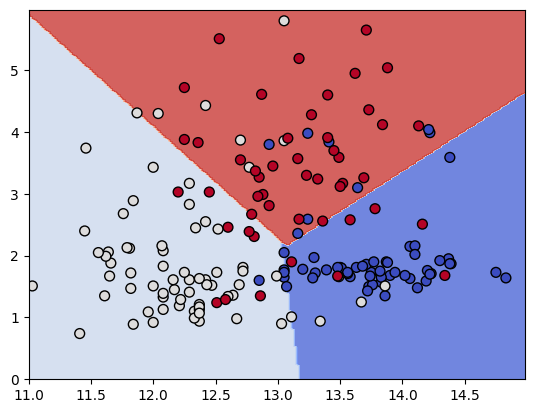

Number of original examples 178
Number of support vectors 81


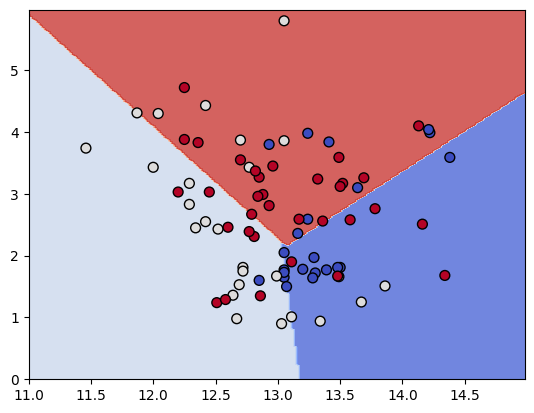

In [27]:
# Train a linear SVM
svm_model = svm.SVC(kernel="linear")
svm_model.fit(X,y)
plot_classifier(X, y, svm_model, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm_model.support_))
X_small = X[svm_model.support_]
y_small = y[svm_model.support_]

# Train a new SVM using only the support vectors
svm_small = svm.SVC(kernel="linear")
svm_small.fit(X_small,y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

By defenition of support vectors the decision boundaries of the two trained models are the same

We'll search for the gamma that maximizes cross-validation accuracy using scikit-learn's GridSearchCV. A binary version of the handwritten digits dataset in which you're just trying to predict whether or not an image is a "2"

In [29]:
X = pd.read_csv('/content/digits_2_X.csv')
y = pd.read_csv('/content/digits_2_y.csv')

In [33]:
# Instantiate an RBF SVM
svm = svm.SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm,parameters)
searcher.fit(X,y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best CV params {'gamma': 0.001}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Larger values of gamma are better for training accuracy, but cross-validation helped us find something different

In the previous cell we saw that the best value of gamma was 0.001 using the default value of C, which is 1. Now we will search for the best combination of C and gamma using GridSearchCV.

In [34]:
from sklearn.model_selection import train_test_split

X, y = X.values, y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [38]:
from sklearn.svm import SVC

# Instantiate an RBF SVM
svm_model = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm_model, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test,y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 1.0
Test accuracy of best grid search hypers: 0.9955555555555555


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Now we will do a hyperparameter search over the regularization strength and the loss (logistic regression vs. linear SVM) using SGDClassifier().

In [41]:
# We set random_state=0 for reproducibility
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
             'loss':['hinge','log_loss']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best CV params {'alpha': 0.001, 'loss': 'hinge'}
Best CV accuracy 1.0
Test accuracy of best grid search hypers: 0.9866666666666667


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

One advantage of SGDClassifier is that it's very fast, this would have taken a lot longer with LogisticRegression or LinearSVC.